# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [226]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

Reflection: The figure is very confusing, becuase the number in percentage and bar height are not consistent. In general, people will get use to see the higher bar height is equivelent to the number labeled. It seems to me the numer here and the descriptions are saying the two different thing. In addition, the y axis has no label or unit. Overall, the figure is not clear and very misleading. 

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

3D bar chart violates the principle of proportional ink. The top of the circle has a larger angle than the bottom. In addition, wedge pie chart in 3D could be enhanced the "bigger on the top even bigger, small in the  botton even smaller". To sum up,  this makes the bottom piece getting even smaller, top getting even bigger. 

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

This figure is upside down, it is very misleading that 873 at the lower position than 721, this makes reader diffuclt to see the number of deaths at the first glance. It is not necessary to put figure upside down, I mean "0" on the top. In general, we human beings get used to see zero is in the center, above zero is positive number and below zero is negative number. The scale and direction need to follow the custom rule. 

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [1]:
%%capture
import pandas as pd
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [2]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

In [3]:
gss_clean['relationship']

0          strongly agree
1                     NaN
2          strongly agree
3                   agree
4                     NaN
              ...        
2343             disagree
2344       strongly agree
2345                  NaN
2346             disagree
2347    strongly disagree
Name: relationship, Length: 2348, dtype: object

In [4]:
gss_clean

,id,weight,sex,education,region,age,income,job_prestige,mother_job_prestige,father_job_prestige,socioeconomic_index,satjob,relationship,male_breadwinner,men_bettersuited,child_suffer,men_overwork
0,1,2.357493,male,14.0,new england,43.0,NaN,47.0,31.0,45.0,65.3,very satisfied,strongly agree,disagree,agree,strongly disagree,agree
1,2,0.942997,female,10.0,new england,74.0,22782.5000,22.0,32.0,39.0,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.942997,male,16.0,new england,42.0,112160.0000,61.0,32.0,72.0,83.4,mod. satisfied,strongly agree,disagree,disagree,disagree,disagree
3,4,0.942997,female,16.0,new england,63.0,158201.8412,59.0,NaN,39.0,69.3,very satisfied,agree,disagree,disagree,disagree,neither agree nor disagree
4,5,0.942997,male,18.0,new england,71.0,158201.8412,53.0,35.0,45.0,68.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2344,0.471499,female,12.0,new england,37.0,NaN,47.0,31.0,72.0,38.8,mod. satisfied,disagree,strongly disagree,disagree,strongly disagree,disagree
2344,2345,0.942997,female,12.0,new england,75.0,22782.5000,28.0,NaN,27.0,21.6,very satisfied,strongly agree,disagree,disagree,disagree,disagree
2345,2346,0.942997,female,12.0,new england,67.0,70100.0000,40.0,45.0,53.0,41.8,NaN,NaN,NaN,NaN,NaN,NaN
2346,2347,0.942997,male,16.0,new england,72.0,38555.0000,47.0,53.0,50.0,62.7,NaN,disagree,agree,disagree,strongly agree,agree


The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [5]:
# reorder degree from "stronger agree" to "agree" and "disagree" to "strongly disagree" 
gss_clean.relationship = gss_clean.relationship.replace({'strongly agree' : 'agree', 'disagree' : 'strongly disagree'})
gss_clean['relationship'].describe()

count      1550
unique        2
top       agree
freq       1150
Name: relationship, dtype: object

In [6]:
gss_clean['relationship'] = gss_clean['relationship'].astype('category')
gss_clean['relationship'] = gss_clean['relationship'].cat.reorder_categories(['agree', 
                                                            'strongly disagree'])
mybars = gss_clean.relationship.value_counts().sort_index()
mybars

agree                1150
strongly disagree     400
Name: relationship, dtype: int64

In [7]:
mybars_df = mybars.reset_index()
mybars_df

,index,relationship
0,agree,1150
1,strongly disagree,400


Text(0.5, 1.0, 'Working women can secure relationship with their children')

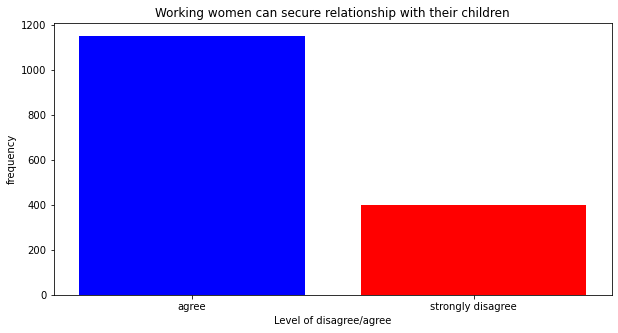

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
 
plt.figure(figsize=(10, 5))
plt.bar(mybars.index, mybars.values, color = ['blue', 'red'])
plt.ylabel('frequency')
plt.xlabel('Level of disagree/agree')
plt.title('Working women can secure relationship with their children')

Text(0.5, 1.0, 'Working women can secure relationship with their children')

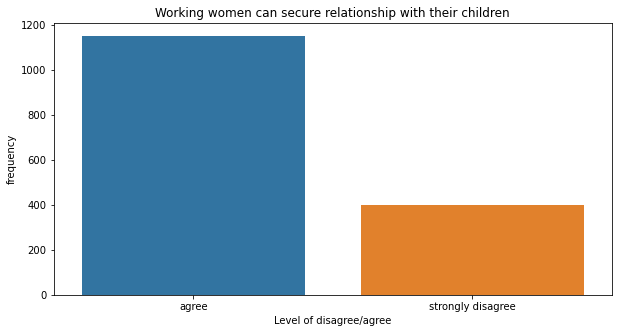

In [9]:
## seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=mybars.index, y=mybars.values, data=mybars_df)
plt.ylabel('frequency')
plt.xlabel('Level of disagree/agree')
plt.title('Working women can secure relationship with their children')

Text(0.5, 1.0, 'Working women can secure relationship with their children')

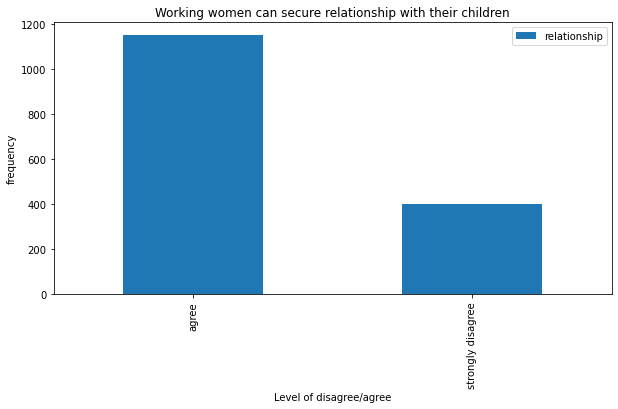

In [10]:
mybars_df.plot(kind='bar', x='index', y='relationship', figsize = [10, 5])
plt.ylabel('frequency')
plt.xlabel('Level of disagree/agree')
plt.title('Working women can secure relationship with their children')

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

In [11]:
gss_plot = gss_clean.groupby(['relationship', 'sex']).size()
gss_plot = gss_plot.reset_index()
gss_plot = gss_plot.rename({0: 'count'}, axis = 1)
gss_plot

,relationship,sex,count
0,agree,female,681
1,agree,male,469
2,strongly disagree,female,185
3,strongly disagree,male,215


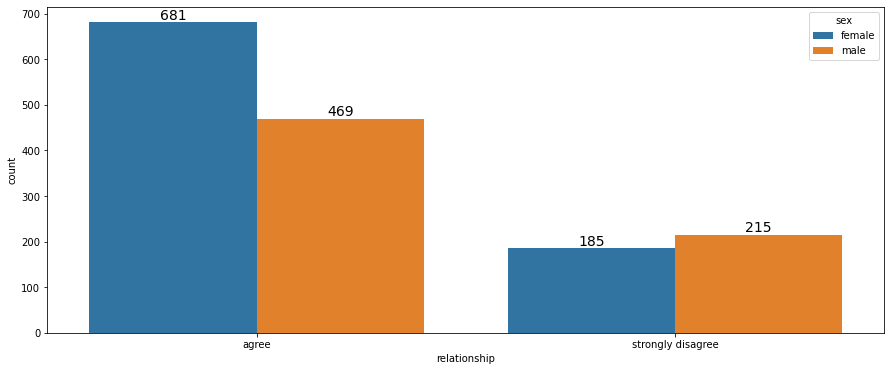

In [12]:
plt.figure(figsize=(15, 6))
myplot = sns.barplot(x='relationship', y='count', hue='sex', data=gss_plot)
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

In [13]:
xtab = pd.crosstab(gss_clean.relationship, gss_clean.sex)
xtab

sex,female,male
relationship,,
agree,681,469
strongly disagree,185,215


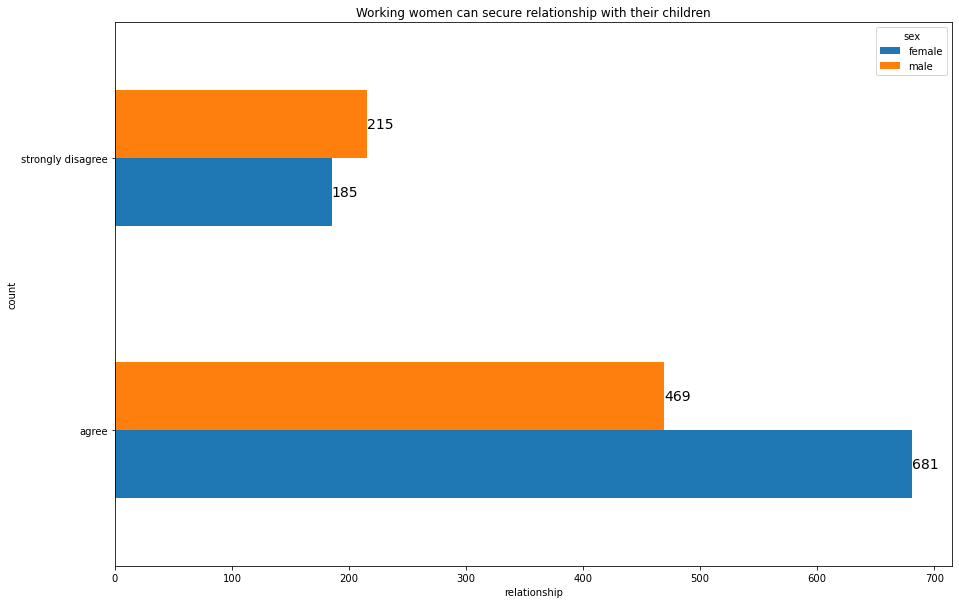

In [14]:
myplot = xtab.plot(kind='barh', figsize = [15,10])
plt.ylabel('count')
plt.xlabel('relationship')
plt.title('Working women can secure relationship with their children')
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

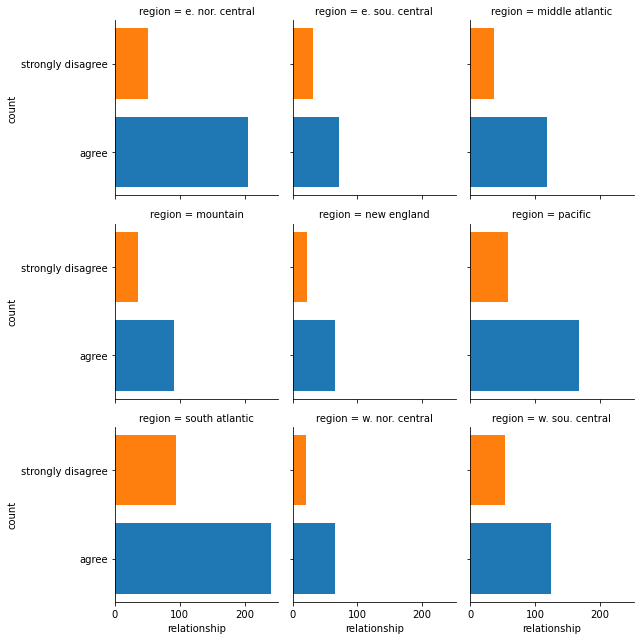

In [15]:
gss_plotc = gss_clean.groupby(['relationship', 'region']).size().reset_index()
gss_plotc = gss_plotc.rename({0 : 'count'}, axis = 1)
g = sns.FacetGrid(gss_plotc, col = 'region', hue = 'relationship', col_wrap=3)
g.map(plt.barh, 'relationship', 'count')

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

In [16]:
mycol = {'job_prestige': 'Occupational Prestige', 'socioeconomic_index' : 'Socioeconomic Status'}

In [17]:
gss_clean.rename(columns = mycol, inplace = True)

In [18]:
gss_clean_p3_line = gss_clean.groupby('education').agg({'Occupational Prestige':'mean', 'Socioeconomic Status' : 'mean'})
gss_clean_p3_line= gss_clean_p3_line[8:20].reset_index()
gss_clean_p3_line

,education,Occupational Prestige,Socioeconomic Status
0,8.0,34.575758,28.724242
1,9.0,37.416667,29.893750
2,10.0,35.516667,30.540000
3,11.0,37.494118,32.792941
4,12.0,39.041667,35.465224
5,13.0,40.988571,40.141714
6,14.0,44.095710,45.442904
7,15.0,43.616667,45.720833
8,16.0,51.905213,62.653318
9,17.0,53.885417,63.201042


(0.0, 80.0)

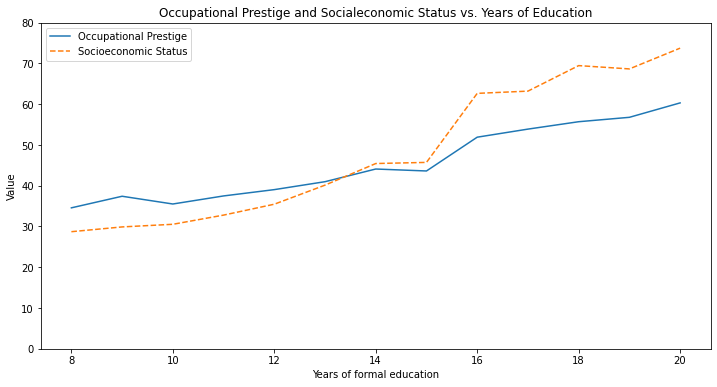

In [19]:
### Please be noticed this is the first plot - a straightforward plot, I have second plot for you as well (We need to use MELT).
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='education', y='Occupational Prestige', data=gss_clean_p3_line)
ax = sns.lineplot(x='education', y='Socioeconomic Status', data=gss_clean_p3_line)
ax.lines[1].set_linestyle("--")
ax.legend(['Occupational Prestige', 'Socioeconomic Status'], facecolor='w')
plt.xlabel('Years of formal education')
plt.ylabel('Value')
plt.title('Occupational Prestige and Socialeconomic Status vs. Years of Education')
plt.ylim(0,80)

In [20]:
gss_clean_p3_line

,education,Occupational Prestige,Socioeconomic Status
0,8.0,34.575758,28.724242
1,9.0,37.416667,29.893750
2,10.0,35.516667,30.540000
3,11.0,37.494118,32.792941
4,12.0,39.041667,35.465224
5,13.0,40.988571,40.141714
6,14.0,44.095710,45.442904
7,15.0,43.616667,45.720833
8,16.0,51.905213,62.653318
9,17.0,53.885417,63.201042


In [21]:
## Melt
gss_clean_melt = gss_clean_p3_line.melt(id_vars = ['education'])
mycol = {'variable' : 'index'}
gss_clean_melt 

,education,variable,value
0,8.0,Occupational Prestige,34.575758
1,9.0,Occupational Prestige,37.416667
2,10.0,Occupational Prestige,35.516667
3,11.0,Occupational Prestige,37.494118
4,12.0,Occupational Prestige,39.041667
5,13.0,Occupational Prestige,40.988571
6,14.0,Occupational Prestige,44.095710
7,15.0,Occupational Prestige,43.616667
8,16.0,Occupational Prestige,51.905213
9,17.0,Occupational Prestige,53.885417


In [22]:
gss_clean_melt.rename(columns = mycol, inplace = True)

In [23]:
gss_clean_melt

,education,index,value
0,8.0,Occupational Prestige,34.575758
1,9.0,Occupational Prestige,37.416667
2,10.0,Occupational Prestige,35.516667
3,11.0,Occupational Prestige,37.494118
4,12.0,Occupational Prestige,39.041667
5,13.0,Occupational Prestige,40.988571
6,14.0,Occupational Prestige,44.095710
7,15.0,Occupational Prestige,43.616667
8,16.0,Occupational Prestige,51.905213
9,17.0,Occupational Prestige,53.885417


(0.0, 80.0)

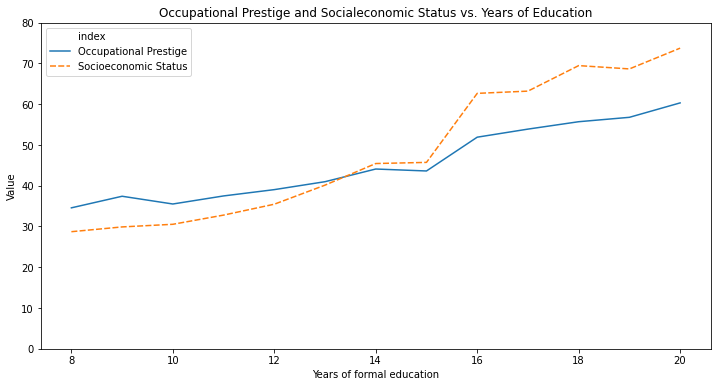

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(x='education', y='value', hue='index',style='index',
             data=gss_clean_melt.query("index=='Occupational Prestige' | index=='Socioeconomic Status'"))
plt.xlabel('Years of formal education')
plt.ylabel('Value')
plt.title('Occupational Prestige and Socialeconomic Status vs. Years of Education')
plt.ylim(0,80)

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

In [25]:
## Lets check gss_clean dataframe again to see if we need to rename column or not!!!
gss_clean

,id,weight,sex,education,region,age,income,Occupational Prestige,mother_job_prestige,father_job_prestige,Socioeconomic Status,satjob,relationship,male_breadwinner,men_bettersuited,child_suffer,men_overwork
0,1,2.357493,male,14.0,new england,43.0,NaN,47.0,31.0,45.0,65.3,very satisfied,agree,disagree,agree,strongly disagree,agree
1,2,0.942997,female,10.0,new england,74.0,22782.5000,22.0,32.0,39.0,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.942997,male,16.0,new england,42.0,112160.0000,61.0,32.0,72.0,83.4,mod. satisfied,agree,disagree,disagree,disagree,disagree
3,4,0.942997,female,16.0,new england,63.0,158201.8412,59.0,NaN,39.0,69.3,very satisfied,agree,disagree,disagree,disagree,neither agree nor disagree
4,5,0.942997,male,18.0,new england,71.0,158201.8412,53.0,35.0,45.0,68.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2344,0.471499,female,12.0,new england,37.0,NaN,47.0,31.0,72.0,38.8,mod. satisfied,strongly disagree,strongly disagree,disagree,strongly disagree,disagree
2344,2345,0.942997,female,12.0,new england,75.0,22782.5000,28.0,NaN,27.0,21.6,very satisfied,agree,disagree,disagree,disagree,disagree
2345,2346,0.942997,female,12.0,new england,67.0,70100.0000,40.0,45.0,53.0,41.8,NaN,NaN,NaN,NaN,NaN,NaN
2346,2347,0.942997,male,16.0,new england,72.0,38555.0000,47.0,53.0,50.0,62.7,NaN,strongly disagree,agree,disagree,strongly agree,agree


In [26]:
## Not a problem and no worries, two columns names have changed during making previous plot, Lets reanme the column back
## Then we can start to do heapmap!
mycol = {'Occupational Prestige' : 'job_prestige', 'Socioeconomic Status' : 'socieconomic_index'}
gss_clean.rename(columns = mycol, inplace = True)
gss_clean ## the column names are suit for this problem now!

,id,weight,sex,education,region,age,income,job_prestige,mother_job_prestige,father_job_prestige,socieconomic_index,satjob,relationship,male_breadwinner,men_bettersuited,child_suffer,men_overwork
0,1,2.357493,male,14.0,new england,43.0,NaN,47.0,31.0,45.0,65.3,very satisfied,agree,disagree,agree,strongly disagree,agree
1,2,0.942997,female,10.0,new england,74.0,22782.5000,22.0,32.0,39.0,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.942997,male,16.0,new england,42.0,112160.0000,61.0,32.0,72.0,83.4,mod. satisfied,agree,disagree,disagree,disagree,disagree
3,4,0.942997,female,16.0,new england,63.0,158201.8412,59.0,NaN,39.0,69.3,very satisfied,agree,disagree,disagree,disagree,neither agree nor disagree
4,5,0.942997,male,18.0,new england,71.0,158201.8412,53.0,35.0,45.0,68.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2344,0.471499,female,12.0,new england,37.0,NaN,47.0,31.0,72.0,38.8,mod. satisfied,strongly disagree,strongly disagree,disagree,strongly disagree,disagree
2344,2345,0.942997,female,12.0,new england,75.0,22782.5000,28.0,NaN,27.0,21.6,very satisfied,agree,disagree,disagree,disagree,disagree
2345,2346,0.942997,female,12.0,new england,67.0,70100.0000,40.0,45.0,53.0,41.8,NaN,NaN,NaN,NaN,NaN,NaN
2346,2347,0.942997,male,16.0,new england,72.0,38555.0000,47.0,53.0,50.0,62.7,NaN,strongly disagree,agree,disagree,strongly agree,agree


In [27]:
## select the columns we want
mycol = ['job_prestige', 'father_job_prestige', 'mother_job_prestige', 'income', 'socieconomic_index']
## make subset table
gss_clean_partb = gss_clean[mycol]
## do correlation
my_corr = gss_clean_partb.corr()
my_corr

,job_prestige,father_job_prestige,mother_job_prestige,income,socieconomic_index
job_prestige,1.000000,0.192180,0.189262,0.340995,0.835515
father_job_prestige,0.192180,1.000000,0.235750,0.171048,0.210451
mother_job_prestige,0.189262,0.235750,1.000000,0.164881,0.203486
income,0.340995,0.171048,0.164881,1.000000,0.417210
socieconomic_index,0.835515,0.210451,0.203486,0.417210,1.000000


Text(0.5, 1.0, 'Correlation Between Personal Economic Indicators')

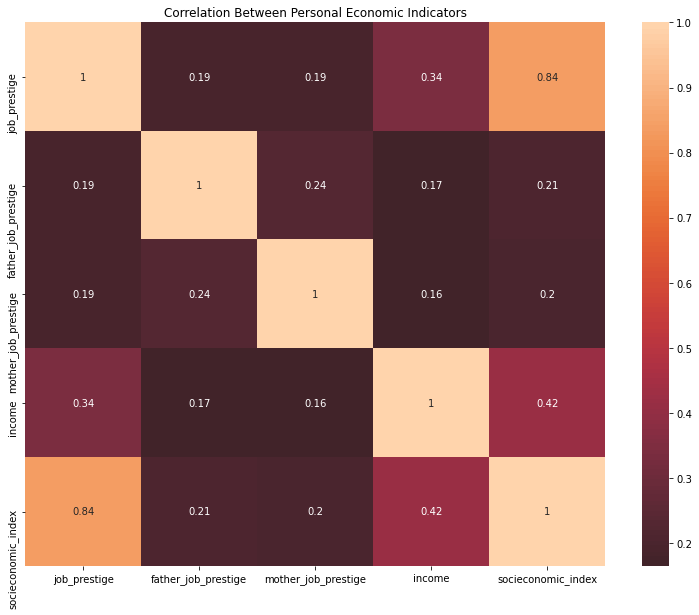

In [28]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr, center=0, annot=True)
plt.title("Correlation Between Personal Economic Indicators")

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

In [29]:
## first we need to change education categorical variables 
## Lets use repalce map to map out
# 0 - 10 to '10 years or fewer'
# 12 to '12 years'
# 13 to '13 years'
# 14 to '14 years'
# 15 to '15 years'
# 16 to '16 years'
# 17 -20 to 'More than 16 years'
replace_map = {1: "10 years or fewer", 2: "10 years or fewer", 3:"10 years or fewer" , 4: "10 years or fewer", 5: "10 years or fewer", 6: "10 years or fewer", 7: "10 years or fewer", 8:"10 years or fewer" , 9: "10 years or fewer", 10: "10 years or fewer", 11: "11 years", 12: "12 years", 13: "13 years", 14: "14 years", 15: "15 years", 16: " 16 years", 17: "More than 16 years", 18: "More than 16 years", 19:"More than 16 years", 20: "More than 16 years"}
gss_clean.education = gss_clean.education .map(replace_map)

In [30]:
gss_clean

,id,weight,sex,education,region,age,income,job_prestige,mother_job_prestige,father_job_prestige,socieconomic_index,satjob,relationship,male_breadwinner,men_bettersuited,child_suffer,men_overwork
0,1,2.357493,male,14 years,new england,43.0,NaN,47.0,31.0,45.0,65.3,very satisfied,agree,disagree,agree,strongly disagree,agree
1,2,0.942997,female,10 years or fewer,new england,74.0,22782.5000,22.0,32.0,39.0,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.942997,male,16 years,new england,42.0,112160.0000,61.0,32.0,72.0,83.4,mod. satisfied,agree,disagree,disagree,disagree,disagree
3,4,0.942997,female,16 years,new england,63.0,158201.8412,59.0,NaN,39.0,69.3,very satisfied,agree,disagree,disagree,disagree,neither agree nor disagree
4,5,0.942997,male,More than 16 years,new england,71.0,158201.8412,53.0,35.0,45.0,68.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2344,0.471499,female,12 years,new england,37.0,NaN,47.0,31.0,72.0,38.8,mod. satisfied,strongly disagree,strongly disagree,disagree,strongly disagree,disagree
2344,2345,0.942997,female,12 years,new england,75.0,22782.5000,28.0,NaN,27.0,21.6,very satisfied,agree,disagree,disagree,disagree,disagree
2345,2346,0.942997,female,12 years,new england,67.0,70100.0000,40.0,45.0,53.0,41.8,NaN,NaN,NaN,NaN,NaN,NaN
2346,2347,0.942997,male,16 years,new england,72.0,38555.0000,47.0,53.0,50.0,62.7,NaN,strongly disagree,agree,disagree,strongly agree,agree


In [31]:
## Obviously, previous question we have 'job_prestige', this question change back to 'Occupation presitage'
## Lets reaname again from 'job prestige' to 'Occupation Prestige' - please be noticed this change due to the request from question
## Lets rename, and do the scatter plot for the second graph!
mycol = {'job_prestige' : 'Occupational Prestige'}
gss_clean.rename(columns = mycol, inplace = True)
## Now we have Occupation Prestige now!

Text(0.5, 0.98, 'Income vs. Prestige by Education')

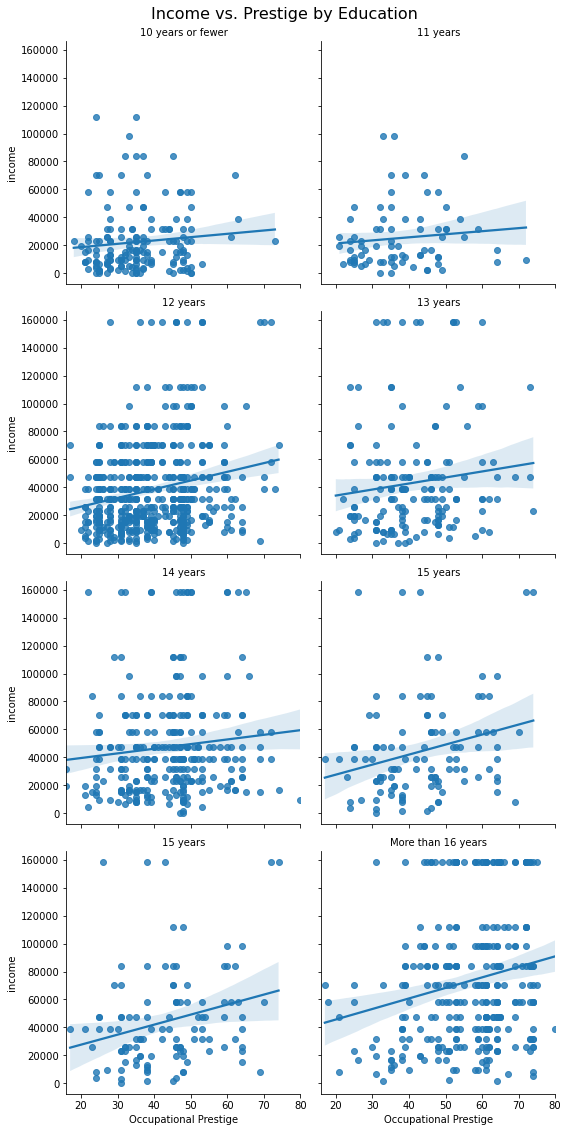

In [34]:
## Lets do regplot for this time

g = sns.FacetGrid(gss_clean, col='education',
                  col_wrap=2, height=4, aspect=1 ,col_order=['10 years or fewer','11 years','12 years', '13 years', '14 years', '15 years', '15 years', 'More than 16 years'])
g.map(sns.regplot, 'Occupational Prestige', 'income', data = gss_clean)
g.set_titles('{col_name}')
g.set_axis_labels('Occupational Prestige', 'income') 
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

In [35]:
gss_clean

,id,weight,sex,education,region,age,income,Occupational Prestige,mother_job_prestige,father_job_prestige,socieconomic_index,satjob,relationship,male_breadwinner,men_bettersuited,child_suffer,men_overwork
0,1,2.357493,male,14 years,new england,43.0,NaN,47.0,31.0,45.0,65.3,very satisfied,agree,disagree,agree,strongly disagree,agree
1,2,0.942997,female,10 years or fewer,new england,74.0,22782.5000,22.0,32.0,39.0,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.942997,male,16 years,new england,42.0,112160.0000,61.0,32.0,72.0,83.4,mod. satisfied,agree,disagree,disagree,disagree,disagree
3,4,0.942997,female,16 years,new england,63.0,158201.8412,59.0,NaN,39.0,69.3,very satisfied,agree,disagree,disagree,disagree,neither agree nor disagree
4,5,0.942997,male,More than 16 years,new england,71.0,158201.8412,53.0,35.0,45.0,68.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2344,0.471499,female,12 years,new england,37.0,NaN,47.0,31.0,72.0,38.8,mod. satisfied,strongly disagree,strongly disagree,disagree,strongly disagree,disagree
2344,2345,0.942997,female,12 years,new england,75.0,22782.5000,28.0,NaN,27.0,21.6,very satisfied,agree,disagree,disagree,disagree,disagree
2345,2346,0.942997,female,12 years,new england,67.0,70100.0000,40.0,45.0,53.0,41.8,NaN,NaN,NaN,NaN,NaN,NaN
2346,2347,0.942997,male,16 years,new england,72.0,38555.0000,47.0,53.0,50.0,62.7,NaN,strongly disagree,agree,disagree,strongly agree,agree


In [36]:
gss_clean.groupby('sex').agg({'income': ['mean', 'min', 'max', 'median', 'std']})

income                                           
                mean    min          max   median           std
sex                                                            
female  47191.021452  350.5  158201.8412  38555.0  41637.984972
male    53314.626187  350.5  158201.8412  38555.0  43097.028533

### <a name="condition"></a> Conditional Means and Other Statistics
The best way to describe the relationship between a categorical feature and a continuous one is with a conditional means table: a table with one row for every category with a column for the means of the observations within each category. We created tables exactly like this with `.groupby()` while performing data aggregation in module 8, so we can employ the same code here. In addition to conditional means, we can include other conditional statistics as well.

For example, to see the relationship between party affiliation and the Biden thermometer ratings, we can construct a table to display these conditional means: 

In [37]:
gss_clean.groupby('sex').agg({'income':'mean'}).round(2)

,income
sex,
female,47191.02
male,53314.63


In [38]:
def q25(x): return x.quantile(0.25)
def q75(x): return x.quantile(0.75)
gss_clean.groupby('sex').agg({'income':['mean', 'median', q25, q75]}).round(2)

income                            
            mean   median       q25      q75
sex                                         
female  47191.02  38555.0  16648.75  57832.5
male    53314.63  38555.0  22782.50  70100.0

## Box plot of income by gender

Text(0.5, 1.0, 'Income vs. Sex')

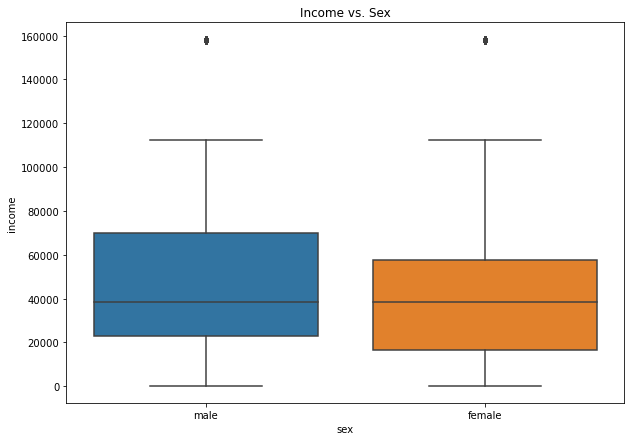

In [39]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'sex', y = 'income', data = gss_clean)
plt.xlabel("sex")
plt.ylabel("income")
plt.title("Income vs. Sex")

In [40]:
mycol = {'job_prestige' : 'Occupational Prestige'}
gss_clean.rename(columns = mycol, inplace = True)

In [41]:
df_male = gss_clean[gss_clean['sex'] == 'male']

In [42]:
df_female = gss_clean[gss_clean['sex'] == 'female']

## Density plot of income by gender

Text(0.5, 1.0, 'Distribution of Income')

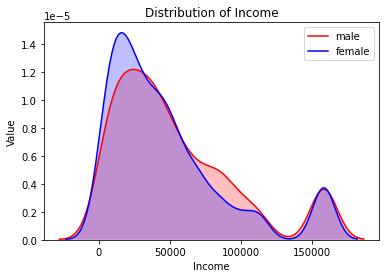

In [43]:
p1 = sns.kdeplot(df_male['income'], label = 'male', shade = True, color = 'r')
p2 = sns.kdeplot(df_female['income'], label = 'female', shade = True, color ='b')
plt.ylabel('Value')
plt.xlabel('Income')
plt.title('Distribution of Income')

## Density plot of Occupational Prestige by gender

Text(0.5, 1.0, 'Distribution of Occupational Prestige')

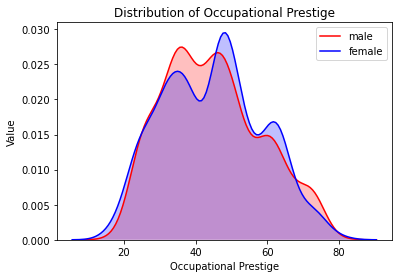

In [44]:
p1 = sns.kdeplot(df_male['Occupational Prestige'], label = 'male', shade = True, color = 'r')
p2 = sns.kdeplot(df_female['Occupational Prestige'], label = 'female', shade = True, color ='b')
plt.ylabel('Value')
plt.xlabel('Occupational Prestige')
plt.title('Distribution of Occupational Prestige')

## Heapmap

In [45]:
df_male

,id,weight,sex,education,region,age,income,Occupational Prestige,mother_job_prestige,father_job_prestige,socieconomic_index,satjob,relationship,male_breadwinner,men_bettersuited,child_suffer,men_overwork
0,1,2.357493,male,14 years,new england,43.0,NaN,47.0,31.0,45.0,65.3,very satisfied,agree,disagree,agree,strongly disagree,agree
2,3,0.942997,male,16 years,new england,42.0,112160.0000,61.0,32.0,72.0,83.4,mod. satisfied,agree,disagree,disagree,disagree,disagree
4,5,0.942997,male,More than 16 years,new england,71.0,158201.8412,53.0,35.0,45.0,68.6,NaN,NaN,NaN,NaN,NaN,NaN
7,8,0.471499,male,12 years,middle atlantic,43.0,38555.0000,35.0,25.0,NaN,23.7,very satisfied,NaN,NaN,NaN,NaN,NaN
9,10,0.942997,male,12 years,new england,55.0,70100.0000,39.0,72.0,44.0,57.1,mod. satisfied,strongly disagree,disagree,disagree,agree,agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,2331,1.414496,male,14 years,new england,50.0,84120.0000,44.0,40.0,29.0,52.5,mod. satisfied,agree,disagree,disagree,disagree,agree
2333,2334,0.942997,male,More than 16 years,new england,76.0,112160.0000,72.0,47.0,45.0,77.4,NaN,agree,strongly disagree,disagree,disagree,agree
2340,2341,0.471499,male,10 years or fewer,new england,89.0,NaN,35.0,NaN,46.0,32.0,NaN,agree,disagree,disagree,disagree,NaN
2342,2343,1.885994,male,12 years,new england,19.0,11391.2500,NaN,39.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
## select the columns we want
mycol = ['Occupational Prestige', 'income', 'socieconomic_index']
## make subset table
df_male_h = df_male[mycol]
## do correlation
my_corr_m = df_male_h.corr()
my_corr_m

,Occupational Prestige,income,socieconomic_index
Occupational Prestige,1.000000,0.385407,0.870488
income,0.385407,1.000000,0.454065
socieconomic_index,0.870488,0.454065,1.000000


## Correlation Between male income, socioeconomic status

Text(0.5, 1.0, 'Correlation Between male income, socioeconomic status')

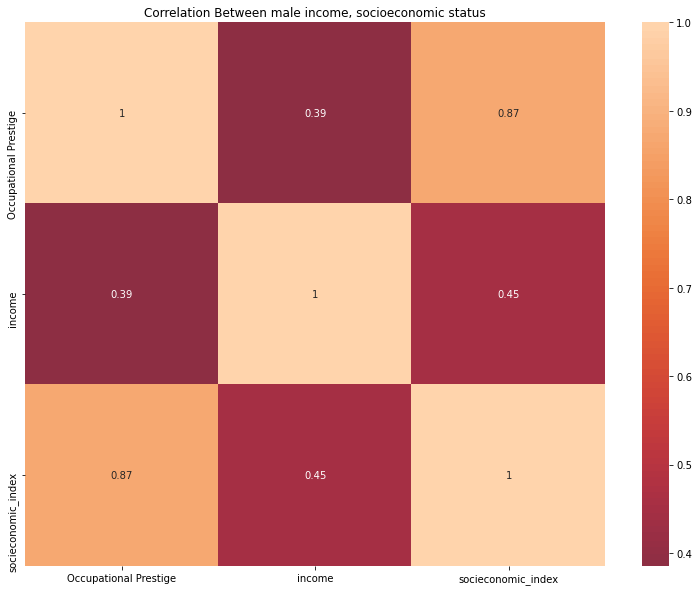

In [48]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr_m, center=0, annot=True)
plt.title("Correlation Between male income, socioeconomic status")

In [50]:
## select the columns we want
mycol = ['Occupational Prestige', 'income', 'socieconomic_index']
## make subset table
df_female_h = df_female[mycol]
## do correlation
my_corr_f = df_female_h.corr()
my_corr_f

,Occupational Prestige,income,socieconomic_index
Occupational Prestige,1.000000,0.304604,0.808672
income,0.304604,1.000000,0.387143
socieconomic_index,0.808672,0.387143,1.000000


## Correlation Between female income, socioeconomic status

Text(0.5, 1.0, 'Correlation Between female income, socioeconomic status')

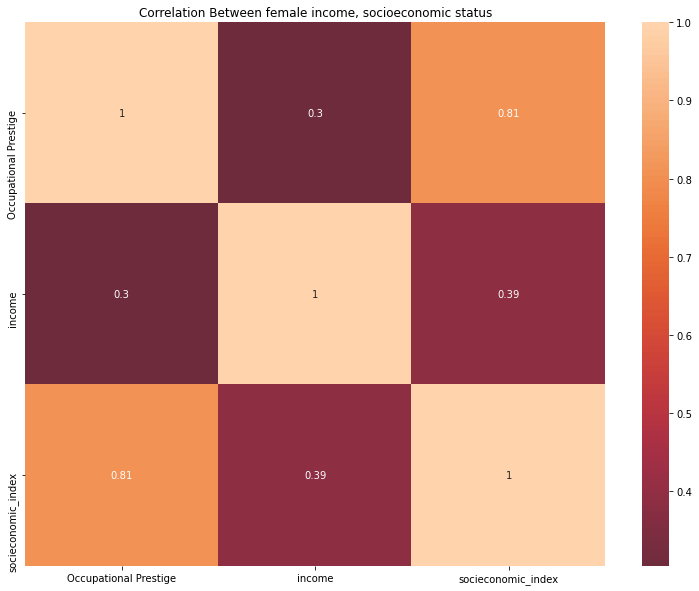

In [51]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr_f, center=0, annot=True)
plt.title("Correlation Between female income, socioeconomic status")

## Occupational Prestige vs. Income by Sex

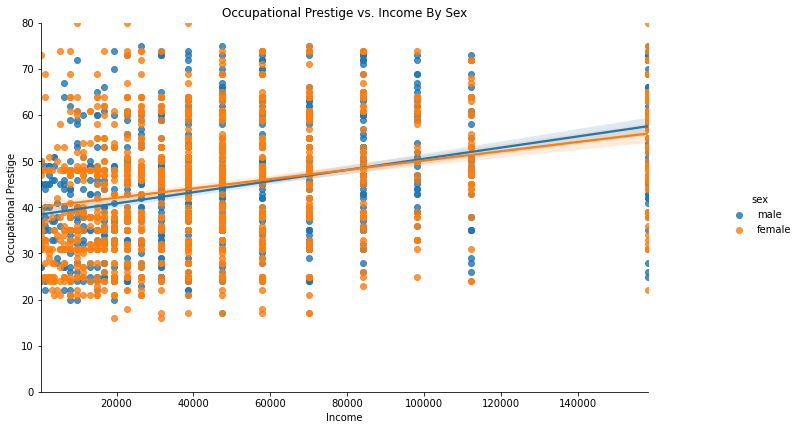

In [52]:
g = sns.lmplot(x ='income', y ='Occupational Prestige',  
          fit_reg = True, hue = 'sex', 
          data = gss_clean) 
plt.xlabel('Income')
plt.ylabel('Occupational Prestige')
plt.title('Occupational Prestige vs. Income By Sex')
plt.ylim(0,80)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

Reflection: 
(1)Do men have higher incomes than women?

(2)If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

Answer to the first question, do men have higher incomes than women? If we make judgement based on mean value, the average income of men is USD 53315 and the average income of women is USD 47191. We can see the men's income based on average value is higher than women's income. However, if we use median value to answer the same quesiton, the median income for men is USD 38555 and the median income for women is USD 38555. You can see there is a gap between median value and mean value. And, the median income for both men and women are the same.  I further look up 25th and 75th percentiles, both 25th and 75th from women are lower than men's income. I would like to conclude men's income is higher than women's income based on mean, 25th, 75th percentiles, but the median incomes are the same while comparing men and women. 
I do not agrree the differences due to the fact that men have jobs with higher occupational prestige. 
First, the occupational prestiage is widely distributed from low income to high income regardless gender. If we look at income vs.occupational prestige by gender, the slop is not much differences comparing men and women.
Second, I've checked the correlation coefficients of income vs. occupational prestiege for men and women. The coefficients are 0.3, 0.39, this means the correlation between income vs. occupational prestige is not very strong. 

In my opinions, the reasons why men's income in average is higher than women's income is due to the fact 25%, 75% quantile are higher from men than women. This implies men earned more for both high income and low income. Therfore, the average income of men is higher than women.